In [ ]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

%matplotlib inline

In [ ]:
audio_file = "beeAudioFile.mp3"
audio_data, sampling_rate = librosa.load(audio_file, sr=None)  # sr=None to get the original sampling rate

# Play the audio using IPython's Audio
# ipd.Audio(audio_data, rate=sampling_rate)


In [ ]:
print("Sample rate: {0}Hz".format(sampling_rate))
print("Audio duration: {0}s".format(len(audio_data) / sampling_rate))

Sample rate: 48000Hz
Audio duration: 155.352s


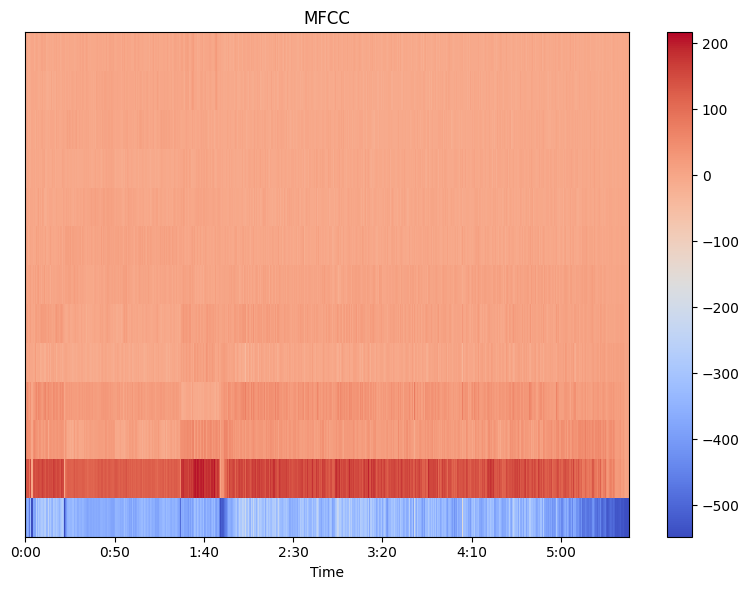

In [ ]:
# Compute MFCC coefficients
n_mfcc = 13  # Number of desired IMFCC coefficients
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=n_mfcc, hop_length=512)

# Display MFCCs as an image
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

# Convert time frames to time in seconds
#time_in_seconds = librosa.times_like(mfccs.shape[1], sr=sampling_rate)
# Set custom x-axis ticks
#plt.xticks(np.arange(0, time_in_seconds[-1], 100))

plt.tight_layout()
plt.show()

In [ ]:
# Define the target sample rate (e.g., 16000 Hz for 16 kHz)

target_sr = 2000

# Resample the audio to the target sample rate
y_resampled = librosa.resample(audio_data, orig_sr=sampling_rate, target_sr=target_sr)

# Save the resampled audio to a new file
output_file_path = 'file_resampled.wav'
sf.write(output_file_path, y_resampled, target_sr)

# ipd.Audio(output_file_path)

# print resampled file

sample_rate_reduced, audio = wavfile.read( "file_resampled.wav")
#sample_rate, audio = librosa.load("beeAudioFile.mp3")
print("Sample rate: {0}Hz".format(sample_rate_reduced))
print("Audio duration: {0}s".format(len(audio) / sample_rate_reduced))

Sample rate: 2000Hz
Audio duration: 155.352s


# figure part is done for verification

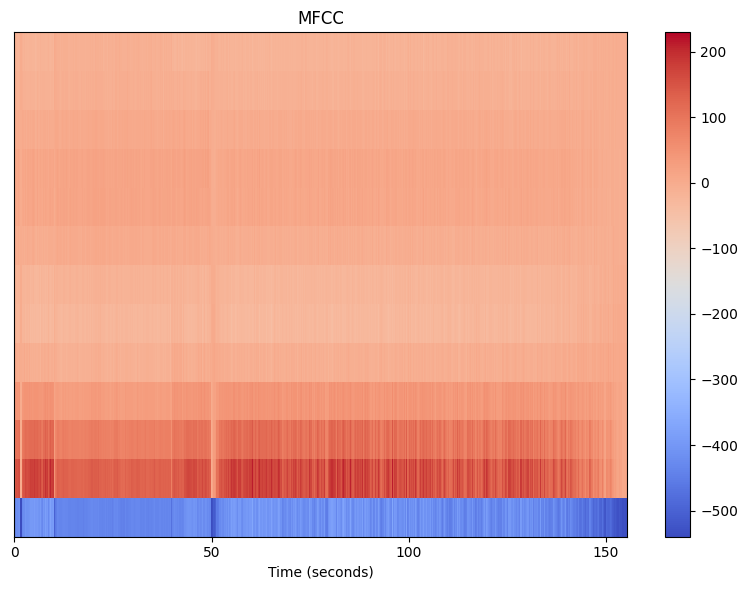

In [ ]:
# Compute MFCC coefficients
n_mfcc = 13  # Number of desired IMFCC coefficients

y_new, sr_r = librosa.load("file_resampled.wav")

mfccs = librosa.feature.mfcc(y=y_new, sr=sr_r, n_mfcc=n_mfcc, hop_length=512)

# Display MFCCs as an image
plt.figure(figsize=(8, 6))
librosa.display.specshow(mfccs, x_axis='s' )
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:

# resample for queen part
queen_audio_file = "queenSoundCombined.mp3"
queen_audio_data, queen_sampling_rate = librosa.load(queen_audio_file, sr=None)  # sr=None to get the original sampling rate
y_queen_resampled = librosa.resample(queen_audio_data, orig_sr=queen_sampling_rate, target_sr=target_sr)

output_queen_file_path = 'queen_resampled.wav'
sf.write(output_queen_file_path, y_queen_resampled, target_sr)
queen_sample_rate_reduced, queen_audio = wavfile.read(output_queen_file_path)
#sample_rate, audio = librosa.load("beeAudioFile.mp3")
print("Sample rate: {0}Hz".format(queen_sample_rate_reduced))
print("Audio duration: {0}s".format(len(queen_audio) / sample_rate_reduced))


# resample for no queen part
no_queen_audio_file = "noQueenSoundCombined.mp3"
no_queen_audio_data, no_queen_sampling_rate = librosa.load(no_queen_audio_file, sr=None)  # sr=None to get the original sampling rate
y_no_queen_resampled = librosa.resample(no_queen_audio_data, orig_sr=no_queen_sampling_rate, target_sr=target_sr)

output_no_queen_file_path = 'no_queen_resampled.wav'
sf.write(output_no_queen_file_path, y_no_queen_resampled, target_sr)
no_queen_sample_rate_reduced, no_queen_audio = wavfile.read(output_no_queen_file_path)
#sample_rate, audio = librosa.load("beeAudioFile.mp3")
print("Sample rate: {0}Hz".format(no_queen_sample_rate_reduced))
print("Audio duration: {0}s".format(len(no_queen_audio) / no_queen_sample_rate_reduced))

Sample rate: 2000Hz
Audio duration: 368.833s
Sample rate: 2000Hz
Audio duration: 4050.793s


In [ ]:

# Define segment length and hop length in seconds
segment_length = 30  # seconds
hop_length  = 10     # seconds (hop_length of 10 seconds)


In [ ]:
# generate queen segment

# Calculate frame length and hop length in samples
frame_length = int(segment_length * queen_sampling_rate)
hop_length_samples = int(hop_length * queen_sampling_rate)

# Iterate over the audio and create overlapping segments
queen_segments = []
start_sample = 0

while start_sample + frame_length <= len(queen_audio_data):
    segment = queen_audio_data[start_sample:start_sample + frame_length]
    queen_segments.append(segment)
    start_sample += hop_length_samples

# Label the segments
labels = []

# First 30 seconds are labeled as queen, rest as non-queen
for i in range(len(queen_segments)):
        labels.append(1)  # Queen

# Save each segment with its corresponding label
for i, segment in enumerate(queen_segments):
    label = labels[i]
    segment_filename = f"segment_{i + 1}_label{label}.wav"
    sf.write(segment_filename, segment, target_sr)
print("Segments saved with labels.")

# 2000,  MFCC for each, 2000 MFCC features,  divded features, 1800 for training  200 for testing feed  LSTM and SVM



Segments saved with labels.


In [21]:
# generate no queen segment

# Calculate frame length and hop length in samples
frame_length = int(segment_length * no_queen_sampling_rate)
hop_length_samples = int(hop_length * no_queen_sampling_rate)

# Iterate over the audio and create overlapping segments
no_queen_segments = []
start_sample = 0

while start_sample + frame_length <= len(no_queen_audio_data):
    no_queen_segment = no_queen_audio_data[start_sample:start_sample + frame_length]
    no_queen_segments.append(no_queen_segment)
    start_sample += hop_length_samples

# Label the segments
no_queen_labels = []


for i in range(len(no_queen_segments)):
        no_queen_labels.append(0)  # no Queen

index = len(queen_segments)

# Save each segment with its corresponding label
for j, no_queen_segment in enumerate(no_queen_segments):
    label = no_queen_labels[j]
    segment_filename = f"segment_{index + 1}_label0.wav"
    sf.write(segment_filename, segment, target_sr)
    index += 1
    # Increment index to continue with queen segments

print("No Queen Segments saved with labels.")

No Queen Segments saved with labels.
